In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/home/vituri/Documentos/GitHub/TDA_workshop_EBT2024"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using Meshes, GeoIO
import GLMakie as gl
using ProgressMeter

In [3]:
read_mesh(filepath) = GeoIO.load(filepath).geometry

plot_mesh(ms) = viz(ms);

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


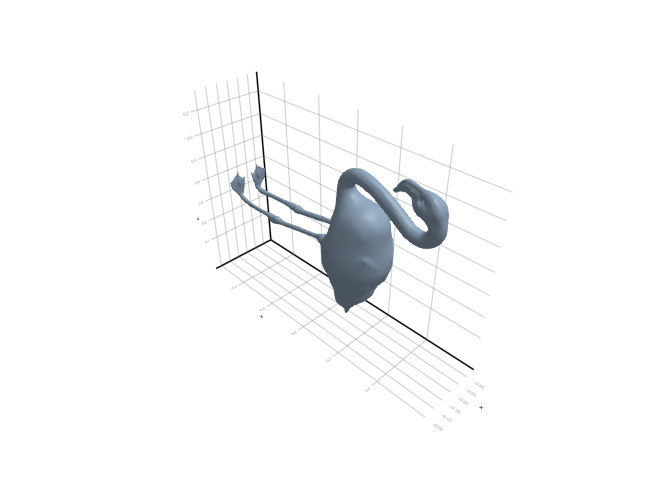

In [4]:
filepath = "meshes/flamingo-poses/flam-reference.obj"
ms = read_mesh(filepath)

plot_mesh(ms)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


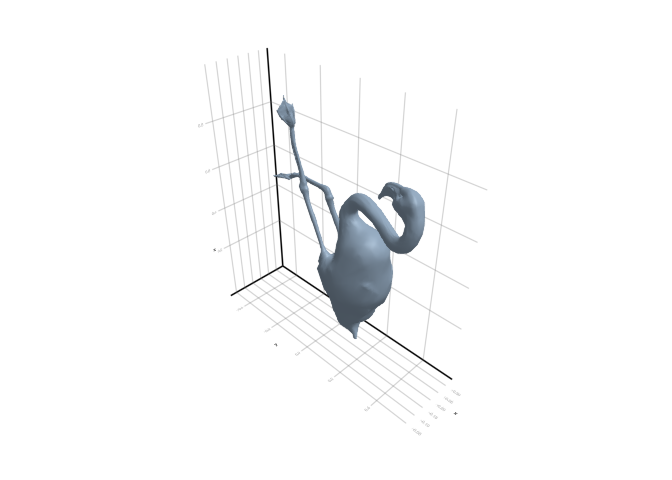

In [5]:
ms2 = read_mesh("meshes/flamingo-poses/flam-01.obj")

plot_mesh(ms2)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


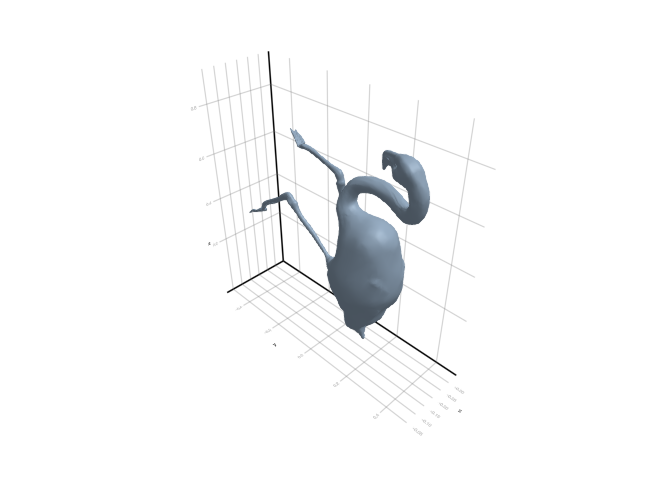

In [6]:
ms2 = read_mesh("meshes/flamingo-poses/flam-02.obj")

plot_mesh(ms2)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


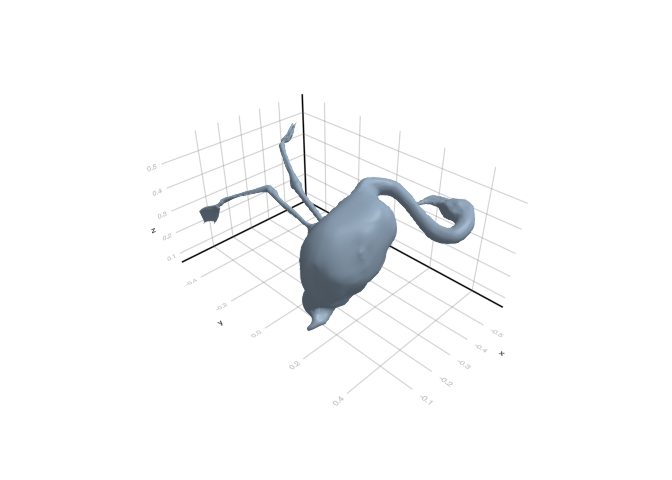

In [7]:
ms2 = read_mesh("meshes/flamingo-poses/flam-03.obj")

plot_mesh(ms2)

In [8]:
readdir("meshes/")

8-element Vector{String}:
 "camel-poses"
 "cat-poses"
 "elephant-poses"
 "face-poses"
 "flamingo-poses"
 "head-poses"
 "horse-poses"
 "lion-poses"

In [9]:
using MetricSpaces

mesh_to_metric_space(ms) = ms.vertices .|> coordinates .|> Vector |> EuclideanSpace

mesh_to_metric_space (generic function with 1 method)

In [10]:
X = mesh_to_metric_space(ms)

26907-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.0497887, 0.179158, 0.304686]
 [-0.0478521, 0.176355, 0.337555]
 [-0.0489072, 0.170843, 0.36641]
 [-0.0479558, 0.154587, 0.319926]
 [-0.0484908, 0.148718, 0.356395]
 [-0.0549708, 0.129732, 0.300859]
 [-0.0529351, 0.125235, 0.325443]
 [-0.0537256, 0.124306, 0.346663]
 [-0.0569744, 0.201286, 0.371339]
 [-0.0536567, 0.19095, 0.297565]
 [-0.0522451, 0.191074, 0.306529]
 [-0.0571656, 0.181709, 0.282749]
 [-0.0524422, 0.185973, 0.296856]
 ⋮
 [-0.209925, 0.44, 0.658976]
 [-0.20707, 0.420017, 0.655563]
 [-0.210662, 0.444178, 0.660018]
 [-0.211038, 0.441635, 0.658588]
 [-0.208734, 0.420334, 0.651864]
 [-0.211586, 0.429432, 0.654244]
 [-0.210811, 0.425791, 0.653265]
 [-0.210709, 0.423044, 0.649643]
 [-0.211377, 0.439884, 0.657541]
 [-0.211205, 0.437203, 0.65695]
 [-0.211346, 0.434063, 0.656262]
 [-0.212218, 0.433793, 0.654967]

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


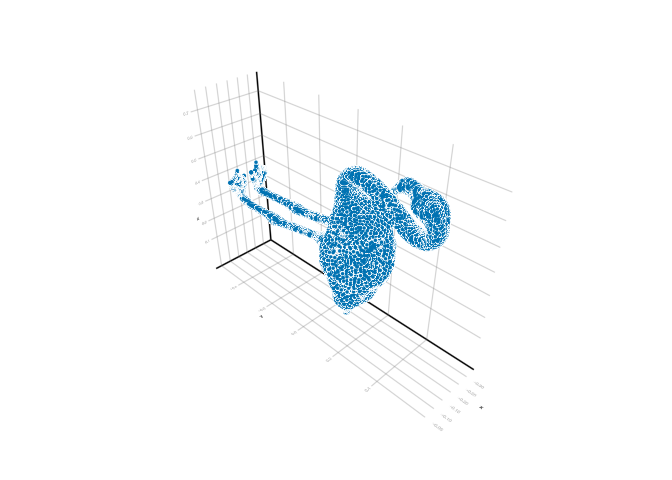

In [11]:
gl.scatter(X, markersize = 5)

In [12]:
using Graphs, SimpleWeightedGraphs

function graph_from_mesh(ms)
    # the set of vertices
    V = coordinates.(ms.vertices)

    # create an empty graph
    g = SimpleWeightedGraph()

    # add n vertices to it
    n = length(V)
    add_vertices!(g, n)

    # the set of triangles of the mesh ms
    triangles = ms.topology.connec

    # for each triangle, add its edges to the graph
    @showprogress desc = "Adding vertices to graph..." for t ∈ triangles
        v1, v2, v3 = t.indices
        add_edge!(g, v1, v2, dist_euclidean(V[v1], V[v2]))
        add_edge!(g, v1, v3, dist_euclidean(V[v1], V[v3]))
        add_edge!(g, v2, v3, dist_euclidean(V[v2], V[v3]))
    end

    g
end;

In [13]:
g = graph_from_mesh(ms)

Adding vertices to graph...   0%|                        |  ETA: 1:35:51

Adding vertices to graph... 100%|████████████████████████| Time: 0:00:01


{26907, 79244} undirected simple Int64 graph with Float64 weights

In [14]:
weights(g)

26907×26907 SparseArrays.SparseMatrixCSC{Float64, Int64} with 158488 stored entries:
⎡⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣶⣶⣖⣆⣀⡀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠤⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠈⢋⠛⠿⡿⣿⣿⣾⣆⣀⡀⠀⠀⠀⠀⠀⠉⠛⠿⢤⡀⠀⠀⠈⠁⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠛⠻⠿⠷⠷⣦⣀⡀⠀⠀⠀⠀⠀⠉⠙⠂⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠠⠠⠄⡀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠳⢤⣄⣀⠀⠀⠀⠐⢦⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠐⠒⠀⠀⠀⠀⠀⠀⢀⡀⠀⠈⠉⠛⠳⠶⣤⣈⠙⎥
⎢⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠰⣦⣤⣠⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠈⠉⠂⠀⠀⠀⠉⠛⎥
⎢⢻⣿⡀⠀⠀⠀⠀⠀⠀⠀⠀⣻⣿⣿⣿⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⢸⢿⡦⢀⠀⠀⢠⠀⠀⠀⠀⠐⠛⢿⢿⣷⣷⡤⡄⢐⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠈⢹⣿⡄⠀⠀⠀⡂⠀⠀⠀⠀⠀⠀⠙⡿⣿⣿⣷⣾⣄⢀⡀⠀⠀⠀⠀⠀⠀⠀⠑⣖⠂⠀⠀⠀⠀⠀⠂⠀⎥
⎢⠀⢈⣿⣯⡀⠀⠀⠡⡀⠀⠀⠀⠀⠀⢀⢉⣹⣿⣿⣿⣼⣕⣀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢷⡄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⣻⣿⣷⠀⠀⠀⢃⠀⠀⠀⠀⠀⠀⠀⠀⢙⢖⢿⣿⣿⣧⣲⣀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣄⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⢹⣿⡆⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⠘⢩⣻⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠹⣧⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⢽⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠙⢿⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⢻⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠻⣦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢧⠀⠀⠀⠈⣧⠀⠀⢀⠀⠀⠈⠘⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣦⡄⠀⠀⠀⠀⠀⠀⢀⠀⠀⎥
⎢⠀⠈⣧⠀⠀⠀⠙⣆⠀⠈⠆⠀⠀⠀⠀⠉⢱⢤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣦⡀⠀⠀⠀⠀⠘⢲⠀⎥
⎢⠀⠀⠛⣇⠀⠀⠀⢹⡆⠀⡆⠀⠀⠀⠀⠀⠈⠀⠙⠷⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⢰⣀⎥
⎢⠀⠀⠀⠈⣇⠀⠀⠀⢿⡀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠷⣦⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠿⣧⣀⠀⠀⠙⎥
⎢⠀⠀⡀⠀⠈⠀⢀⠀⠘⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⢀⣀⠀⠀⠀⠀⠘⠻⣦⡀⠀⎥
⎣⠀⠀⠁⠀⠀⠀⠈⠓⣆⠘⣧⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠒⠐⢲⣄⠀⠀⠈⠻⣦⎦

In [15]:
is_connected(g)

false

In [16]:
connected_components(g)

514-element Vector{Vector{Int64}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  26898, 26899, 26900, 26901, 26902, 26903, 26904, 26905, 26906, 26907]
 [4032]
 [4036]
 [4039]
 [4042]
 [4046]
 [4047]
 [4048]
 [4049]
 [4050]
 [4077]
 [4099]
 [4100]
 ⋮
 [7089]
 [7090]
 [7091]
 [7092]
 [7093]
 [7094]
 [7095]
 [7096]
 [7097]
 [7098]
 [7099]
 [7100]

In [17]:
function extract_biggest_connected_component(g)
    cc_components = connected_components(g)
    ids_biggest_component = cc_components[findmax(length, cc_components)[2]]

    # modify the graph g on place
    g = g[ids_biggest_component]

    # return the ids of the biggest connected component
    g, ids_biggest_component
end

extract_biggest_connected_component (generic function with 1 method)

In [18]:
g, ids_biggest_component = extract_biggest_connected_component(g);

In [19]:
is_connected(g)

true

In [20]:
X = X[ids_biggest_component]

26394-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.0497887, 0.179158, 0.304686]
 [-0.0478521, 0.176355, 0.337555]
 [-0.0489072, 0.170843, 0.36641]
 [-0.0479558, 0.154587, 0.319926]
 [-0.0484908, 0.148718, 0.356395]
 [-0.0549708, 0.129732, 0.300859]
 [-0.0529351, 0.125235, 0.325443]
 [-0.0537256, 0.124306, 0.346663]
 [-0.0569744, 0.201286, 0.371339]
 [-0.0536567, 0.19095, 0.297565]
 [-0.0522451, 0.191074, 0.306529]
 [-0.0571656, 0.181709, 0.282749]
 [-0.0524422, 0.185973, 0.296856]
 ⋮
 [-0.209925, 0.44, 0.658976]
 [-0.20707, 0.420017, 0.655563]
 [-0.210662, 0.444178, 0.660018]
 [-0.211038, 0.441635, 0.658588]
 [-0.208734, 0.420334, 0.651864]
 [-0.211586, 0.429432, 0.654244]
 [-0.210811, 0.425791, 0.653265]
 [-0.210709, 0.423044, 0.649643]
 [-0.211377, 0.439884, 0.657541]
 [-0.211205, 0.437203, 0.65695]
 [-0.211346, 0.434063, 0.656262]
 [-0.212218, 0.433793, 0.654967]

In [21]:
ids_fps = farthest_points_sample(X, 1000);
X_fps = X[ids_fps]

Progress:   0%|▏                                        |  ETA: 0:02:30

Progress:  12%|████▊                                    |  ETA: 0:00:03

Progress:  36%|██████████████▋                          |  ETA: 0:00:01

Progress:  59%|████████████████████████▎                |  ETA: 0:00:00

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


1000-element Vector{StaticArraysCore.SVector{3, Float64}}:
 [-0.102398, 0.0541409, 0.354141]
 [-0.195649, 0.502407, 0.660994]
 [-0.270087, -0.46859, 0.403179]
 [-0.182738, 0.119117, 0.00595822]
 [-0.182755, 0.16202, 0.667542]
 [-0.11117, -0.236885, 0.306592]
 [-0.237924, 0.263987, 0.234966]
 [-0.131961, 0.274083, 0.45478]
 [-0.309222, 0.13766, 0.407333]
 [-0.24547, -0.0887498, 0.338711]
 [-0.0921687, 0.144702, 0.178859]
 [-0.0868923, -0.467545, 0.403375]
 [-0.246744, 0.0822468, 0.249545]
 ⋮
 [-0.0669232, 0.139089, 0.247815]
 [-0.0739433, 0.0941305, 0.292223]
 [-0.0881461, 0.242808, 0.403388]
 [-0.122151, -0.39803, 0.322502]
 [-0.213894, 0.250727, 0.213494]
 [-0.0968953, 0.234423, 0.471918]
 [-0.0571588, 0.118512, 0.353022]
 [-0.143286, 0.467641, 0.6377]
 [-0.183163, 0.456243, 0.591707]
 [-0.221069, 0.0889533, 0.167673]
 [-0.294464, 0.0927223, 0.304625]
 [-0.155312, -0.468422, 0.391171]

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


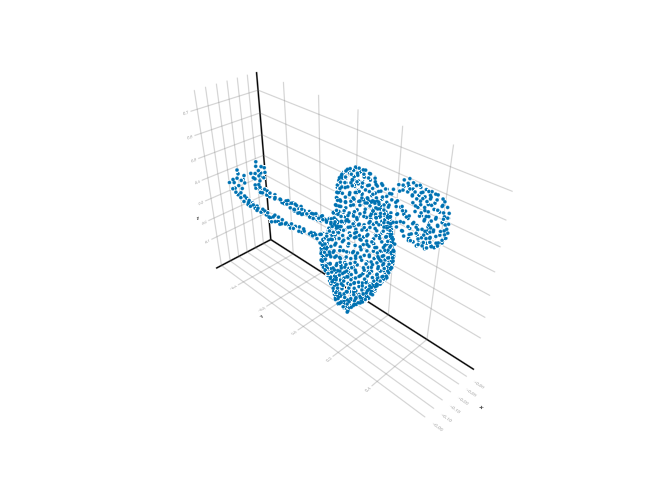

In [22]:
gl.scatter(X_fps, markersize = 5)

In [23]:
function geodesic_distance_from_graph(g, ids)
    n = length(ids)
    D = zeros(n, n)

    @showprogress desc = "Calculating geodesic distance..." Threads.@threads for (i, id) ∈ collect(enumerate(ids))
        dts = dijkstra_shortest_paths(g, id)
        D[i, :] = dts.dists[ids]
    end

    # force simmetry on X, because of small difference
    # in the calculation of paths
    for i ∈ 1:n
        for j ∈ i:n
            D[i, j] = D[j, i]
        end
    end

    # normalize the distance
    max_dist = maximum(D)
    D = D ./ max_dist

    return D
end

geodesic_distance_from_graph (generic function with 1 method)

In [24]:
D = geodesic_distance_from_graph(g, ids_fps)

Calculating geodesic distance...   0%|                   |  ETA: 0:01:41

Calculating geodesic distance...   1%|▎                  |  ETA: 0:00:22

Calculating geodesic distance...   3%|▌                  |  ETA: 0:00:16

Calculating geodesic distance...   4%|▊                  |  ETA: 0:00:13

Calculating geodesic distance...   5%|█                  |  ETA: 0:00:12

Calculating geodesic distance...   6%|█▏                 |  ETA: 0:00:11

Calculating geodesic distance...   7%|█▍                 |  ETA: 0:00:11

Calculating geodesic distance...   9%|█▋                 |  ETA: 0:00:10

Calculating geodesic distance...  10%|█▉                 |  ETA: 0:00:10

Calculating geodesic distance...  11%|██▏                |  ETA: 0:00:09

Calculating geodesic distance...  12%|██▍                |  ETA: 0:00:09

Calculating geodesic distance...  13%|██▌                |  ETA: 0:00:09

Calculating geodesic distance...  14%|██▊                |  ETA: 0:00:09

Calculating geodesic distance...  16%|███                |  ETA: 0:00:09

Calculating geodesic distance...  17%|███▎               |  ETA: 0:00:08

Calculating geodesic distance...  18%|███▌               |  ETA: 0:00:08

Calculating geodesic distance...  19%|███▋               |  ETA: 0:00:08

Calculating geodesic distance...  20%|███▉               |  ETA: 0:00:08

Calculating geodesic distance...  22%|████▏              |  ETA: 0:00:08

Calculating geodesic distance...  23%|████▍              |  ETA: 0:00:07

Calculating geodesic distance...  24%|████▋              |  ETA: 0:00:07

Calculating geodesic distance...  25%|████▊              |  ETA: 0:00:07

Calculating geodesic distance...  26%|█████              |  ETA: 0:00:07

Calculating geodesic distance...  28%|█████▎             |  ETA: 0:00:07

Calculating geodesic distance...  29%|█████▌             |  ETA: 0:00:07

Calculating geodesic distance...  30%|█████▊             |  ETA: 0:00:07

Calculating geodesic distance...  31%|█████▉             |  ETA: 0:00:07

Calculating geodesic distance...  32%|██████▏            |  ETA: 0:00:06

Calculating geodesic distance...  34%|██████▍            |  ETA: 0:00:06

Calculating geodesic distance...  35%|██████▋            |  ETA: 0:00:06

Calculating geodesic distance...  36%|██████▉            |  ETA: 0:00:06

Calculating geodesic distance...  37%|███████▏           |  ETA: 0:00:06

Calculating geodesic distance...  38%|███████▎           |  ETA: 0:00:06

Calculating geodesic distance...  40%|███████▌           |  ETA: 0:00:06

Calculating geodesic distance...  41%|███████▊           |  ETA: 0:00:06

Calculating geodesic distance...  42%|████████           |  ETA: 0:00:05

Calculating geodesic distance...  43%|████████▎          |  ETA: 0:00:05

Calculating geodesic distance...  44%|████████▍          |  ETA: 0:00:05

Calculating geodesic distance...  46%|████████▋          |  ETA: 0:00:05

Calculating geodesic distance...  47%|████████▉          |  ETA: 0:00:05

Calculating geodesic distance...  48%|█████████▏         |  ETA: 0:00:05

Calculating geodesic distance...  49%|█████████▍         |  ETA: 0:00:05

Calculating geodesic distance...  50%|█████████▋         |  ETA: 0:00:05

Calculating geodesic distance...  52%|█████████▉         |  ETA: 0:00:04

Calculating geodesic distance...  53%|██████████         |  ETA: 0:00:04

Calculating geodesic distance...  54%|██████████▎        |  ETA: 0:00:04

Calculating geodesic distance...  55%|██████████▌        |  ETA: 0:00:04

Calculating geodesic distance...  57%|██████████▊        |  ETA: 0:00:04

Calculating geodesic distance...  58%|███████████        |  ETA: 0:00:04

Calculating geodesic distance...  59%|███████████▎       |  ETA: 0:00:04

Calculating geodesic distance...  60%|███████████▌       |  ETA: 0:00:04

Calculating geodesic distance...  62%|███████████▋       |  ETA: 0:00:04

Calculating geodesic distance...  63%|███████████▉       |  ETA: 0:00:03

Calculating geodesic distance...  64%|████████████▏      |  ETA: 0:00:03

Calculating geodesic distance...  65%|████████████▍      |  ETA: 0:00:03

Calculating geodesic distance...  66%|████████████▋      |  ETA: 0:00:03

Calculating geodesic distance...  68%|████████████▉      |  ETA: 0:00:03

Calculating geodesic distance...  69%|█████████████      |  ETA: 0:00:03

Calculating geodesic distance...  70%|█████████████▎     |  ETA: 0:00:03

Calculating geodesic distance...  71%|█████████████▌     |  ETA: 0:00:03

Calculating geodesic distance...  72%|█████████████▊     |  ETA: 0:00:03

Calculating geodesic distance...  74%|██████████████     |  ETA: 0:00:02

Calculating geodesic distance...  75%|██████████████▎    |  ETA: 0:00:02

Calculating geodesic distance...  76%|██████████████▌    |  ETA: 0:00:02

Calculating geodesic distance...  77%|██████████████▋    |  ETA: 0:00:02

Calculating geodesic distance...  78%|██████████████▉    |  ETA: 0:00:02

Calculating geodesic distance...  80%|███████████████▏   |  ETA: 0:00:02

Calculating geodesic distance...  81%|███████████████▍   |  ETA: 0:00:02

Calculating geodesic distance...  82%|███████████████▋   |  ETA: 0:00:02

Calculating geodesic distance...  83%|███████████████▊   |  ETA: 0:00:02

Calculating geodesic distance...  84%|████████████████   |  ETA: 0:00:01

Calculating geodesic distance...  86%|████████████████▎  |  ETA: 0:00:01

Calculating geodesic distance...  87%|████████████████▌  |  ETA: 0:00:01

Calculating geodesic distance...  88%|████████████████▊  |  ETA: 0:00:01

Calculating geodesic distance...  89%|█████████████████  |  ETA: 0:00:01

Calculating geodesic distance...  90%|█████████████████▏ |  ETA: 0:00:01

Calculating geodesic distance...  92%|█████████████████▍ |  ETA: 0:00:01

Calculating geodesic distance...  93%|█████████████████▋ |  ETA: 0:00:01

Calculating geodesic distance...  94%|█████████████████▉ |  ETA: 0:00:01

Calculating geodesic distance...  95%|██████████████████▏|  ETA: 0:00:00

Calculating geodesic distance...  96%|██████████████████▍|  ETA: 0:00:00

Calculating geodesic distance...  98%|██████████████████▋|  ETA: 0:00:00

Calculating geodesic distance...  99%|██████████████████▊|  ETA: 0:00:00

Calculating geodesic distance... 100%|███████████████████| Time: 0:00:08


1000×1000 Matrix{Float64}:
 0.0        0.525173   0.498115  0.264095  …  0.163722   0.158548   0.402445
 0.525173   0.0        0.915987  0.777645     0.663498   0.557259   0.908204
 0.498115   0.915987   0.0       0.656771     0.538541   0.465152   0.854216
 0.264095   0.777645   0.656771  0.0          0.11823    0.228057   0.646264
 0.255194   0.314019   0.64573   0.506354     0.39372    0.289043   0.637551
 0.20752    0.714522   0.66003   0.449322  …  0.346965   0.324789   0.202042
 0.288612   0.629513   0.619678  0.195475     0.161937   0.157045   0.666684
 0.196965   0.483038   0.673244  0.356212     0.329465   0.268467   0.596475
 0.191454   0.483434   0.493864  0.300496     0.193218   0.0806295  0.555343
 0.186457   0.606328   0.314568  0.342573     0.224343   0.151544   0.542989
 0.149257   0.650191   0.580672  0.141337  …  0.120142   0.197467   0.537211
 0.417586   0.923346   0.869358  0.661406     0.558766   0.535334   0.0559521
 0.134464   0.599567   0.475402  0.182472     0.

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/VRavR/src/scenes.jl:220


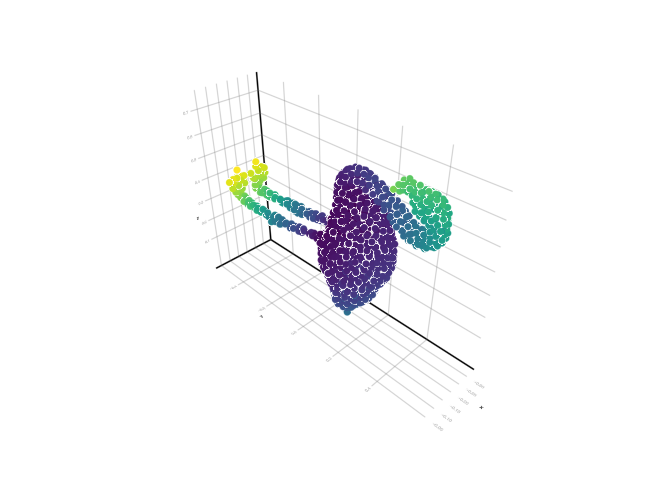

In [25]:
exc = map(sum, eachcol(D))

gl.scatter(X_fps, color = exc, markersize = 10)

In [26]:
import Ripserer as Rp
import PersistenceDiagrams as Pd
import Plots

In [27]:
pd = Rp.ripserer(D, dim_max = 1, verbose=true, sparse = true, threshold = 0.9)

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter ~/.julia/packages/ProgressMeter/dMfiC/src/ProgressMeter.jl:594
Computing 1d intervals... 100%|█████████████████████████| Time: 0:00:00
  intervals:  553


Done. Time: 0:00:03


2-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 1000-element 0-dimensional PersistenceDiagram
 553-element 1-dimensional PersistenceDiagram

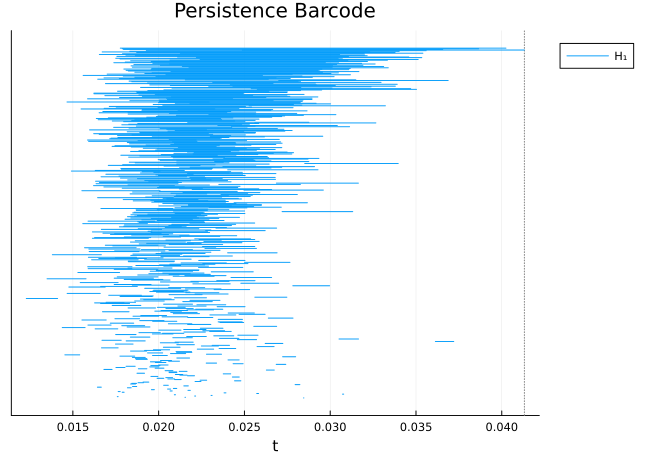

In [28]:
function plot_barcode(pd)
    threshold = pd[2] .|> last |> maximum
    Rp.barcode(pd[2], infinity = threshold)
end

plot_barcode(pd)

In [29]:
function file_to_barcode(filepath, n_points = 1000, dim_max = 1)
    ms = read_mesh(filepath)

    X = mesh_to_metric_space(ms)
    g = graph_from_mesh(ms)

    g, ids_biggest_component = extract_biggest_connected_component(g)
    X = X[ids_biggest_component]

    ids_fps = farthest_points_sample(X, n_points);
    X_fps = X[ids_fps]

    D = geodesic_distance_from_graph(g, ids_fps)

    pd = Rp.ripserer(D, dim_max = dim_max, verbose=true, sparse = true, threshold = 0.8)

    return X_fps, D, pd
end

file_to_barcode (generic function with 3 methods)

In [30]:
# using Chain
# function list_files(path="", pattern="")
#     files =
#         @chain begin
#             map(walkdir(path)) do (root, dirs, files)
#                 joinpath.(root, files)
#             end
#             reduce(vcat, _)
#             filter(x -> occursin(pattern, x), _)
#         end

#     files
# end

In [31]:
# filepaths = list_files("meshes/", "obj")

In [32]:
# filepath = filepaths[10]

# using FileIO
# X_fps, D, pd = file_to_barcode(filepath)


# new_filepath = replace(filepath, ".obj" => ".jld2")
# save_object(new_filepath, pd[2:2])